In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np


In [6]:
energy_df = pd.read_csv("C:/Users/HP/Downloads/energydata_complete.csv")
energy_df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [8]:
features_df = energy_df.drop(columns=['date','lights'])
features_df

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [59]:
features_df = pd.DataFrame(data=MinMaxScaler().fit_transform(features_df),columns=features_df.columns)
features_df

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.327350,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.327350,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.327350,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.327350,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.327350,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.084112,0.926786,0.537657,0.711655,0.606309,0.830841,0.579374,0.864865,0.765258,0.752031,...,0.864724,0.729443,0.891747,0.602326,0.416667,0.238095,0.348718,0.901961,0.861981,0.861981
19731,0.074766,0.919747,0.536006,0.701769,0.607836,0.825302,0.582178,0.864865,0.765258,0.754897,...,0.864724,0.729443,0.887460,0.602326,0.421053,0.250000,0.361538,0.900452,0.985726,0.985726
19732,0.242991,0.919747,0.538666,0.692651,0.627198,0.818378,0.603988,0.864865,0.771233,0.754897,...,0.864724,0.729443,0.883173,0.602326,0.425439,0.261905,0.374359,0.898944,0.583979,0.583979
19733,0.383178,0.919747,0.549491,0.677054,0.634717,0.805085,0.585294,0.864865,0.773794,0.752031,...,0.864724,0.730581,0.878885,0.602326,0.429825,0.273810,0.387179,0.897436,0.126371,0.126371


In [58]:
y=np.reshape(features_df['T6'].values,(-1, 1))
x=np.reshape(features_df['T2'].values,(-1, 1))
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42,test_size=0.3)

model1=LinearRegression()
model1.fit(x_train,y_train)
y_predict=model1.predict(x_test)

print(f'mean absolute: {round(mean_absolute_error(y_test,y_predict),3)},r2 value: {round(r2_score(y_test,y_predict),2)}')
print(f'residual sum:{round(np.sum(np.square(y_test-y_predict)),2)},rmse:{round(np.sqrt(mean_squared_error(y_test,y_predict)),4)}')

mean absolute: 0.082,r2 value: 0.64
residual sum:66.12,rmse:0.1057


In [62]:
y=features_df['Appliances']
x=features_df.drop(columns=['Appliances'])
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42,test_size=0.3)

model2=LinearRegression()
model2.fit(x_train,y_train)
y_predict=model2.predict(x_test)

print(f'mean absolute: {round(mean_absolute_error(y_test,y_predict),2)},r2 value: {round(r2_score(y_test,y_predict),2)}')
print(f'residual sum:{round(np.sum(np.square(y_test-y_predict)),2)},rmse:{round(np.sqrt(mean_squared_error(y_test,y_predict)),3)}')

mean absolute: 0.05,r2 value: 0.15
residual sum:45.35,rmse:0.088


In [37]:
def get_weight(model,dataframe,col_name):
    weight=pd.Series(model.coef_,dataframe.columns).sort_values()
    weight_df=pd.DataFrame(weight).reset_index()
    weight_df.columns=['features',col_name]
    weight_df[col_name].round(3)
    return weight_df

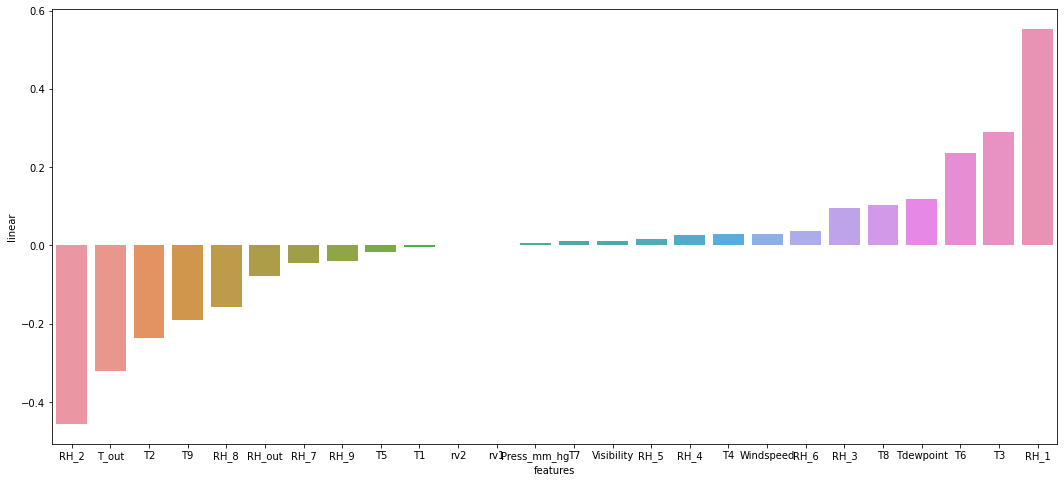

In [42]:
plt.figure(figsize=(18,8))
linear_weight=get_weight(model2,x_train,'linear')
sns.barplot(data=linear_weight,y='linear',x='features')

In [43]:
ridge_model=Ridge(alpha=0.4)
ridge_model.fit(x_train,y_train)
y_predict=ridge_model.predict(x_test)
print(f'rmse:{np.sqrt(mean_squared_error(y_test,y_predict))}')

rmse:0.08753385704628004


In [63]:
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(x_train,y_train)
y_predict=lasso_model.predict(x_test)
# plt.figure(figsize=(18,8))
lasso_weight=get_weight(lasso_model,x_train,'lasso')
print(lasso_weight)
# sns.barplot(data=lasso_weight,y='lasso',x='features')
print(f'rmse: {round(np.sqrt(mean_squared_error(y_test,y_predict)),3)}')

       features     lasso
0        RH_out -0.049557
1          RH_8 -0.000110
2            T1  0.000000
3     Tdewpoint  0.000000
4    Visibility  0.000000
5   Press_mm_hg -0.000000
6         T_out  0.000000
7          RH_9 -0.000000
8            T9 -0.000000
9            T8  0.000000
10         RH_7 -0.000000
11          rv1 -0.000000
12           T7 -0.000000
13           T6  0.000000
14         RH_5  0.000000
15           T5 -0.000000
16         RH_4  0.000000
17           T4 -0.000000
18         RH_3  0.000000
19           T3  0.000000
20         RH_2 -0.000000
21           T2  0.000000
22         RH_6 -0.000000
23          rv2 -0.000000
24    Windspeed  0.002912
25         RH_1  0.017880
rmse: 0.094
